Mounting data from Google drive

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Necessary Imports & Requirments

In [39]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

Load Dataset

In [40]:
df=pd.read_csv("/content/drive/MyDrive/Paid Task Coding Part/Regression/insurance.csv")


In [41]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Unique values

In [44]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Finding duplicate values

In [45]:
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

Dropping duplicate values for the dataset

In [46]:
df.drop_duplicates(inplace=True)

In [47]:

df.shape

(1337, 7)

In [48]:
df.size

9359

Data set Visualization

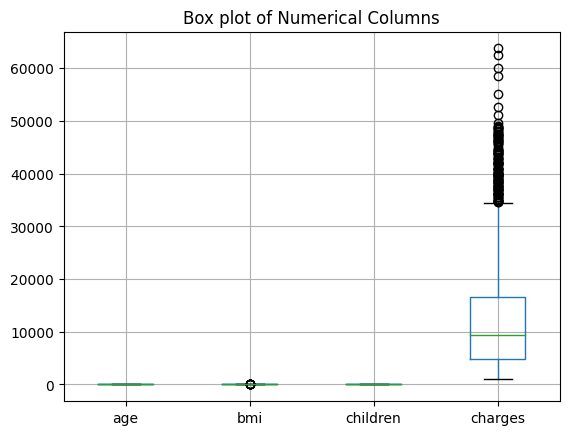

In [49]:
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [50]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

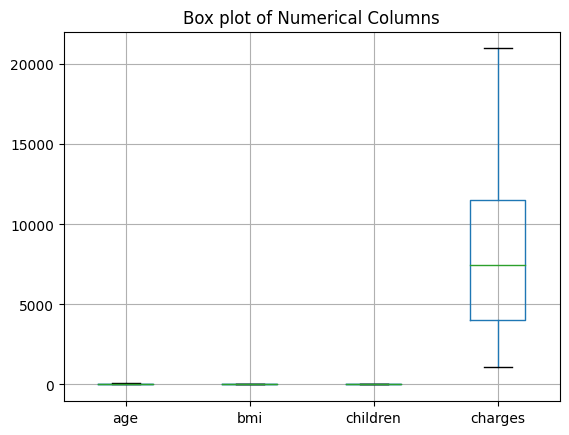

In [51]:
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [52]:
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


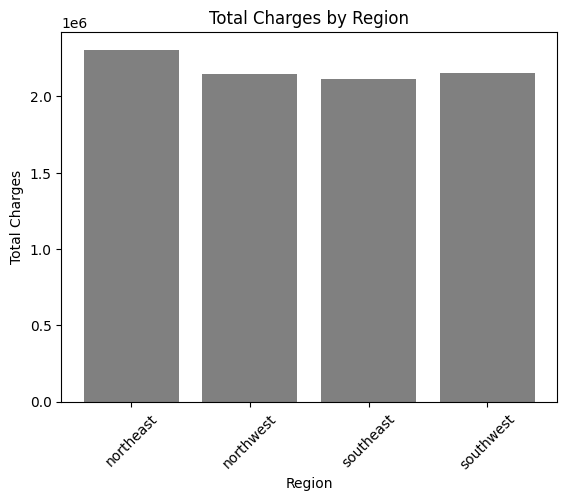

In [53]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

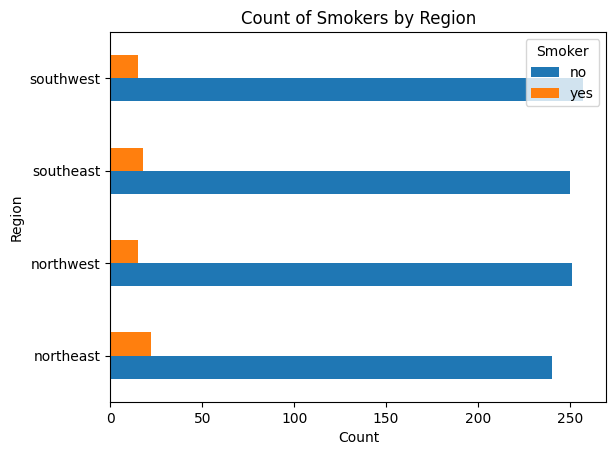

In [54]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

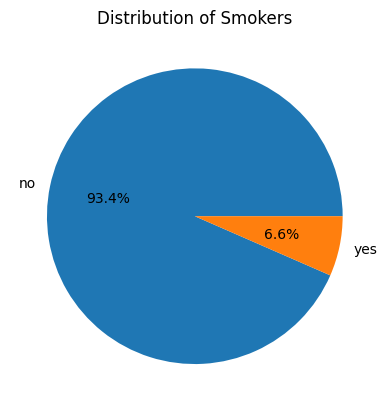

In [55]:
smoker_counts = df_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

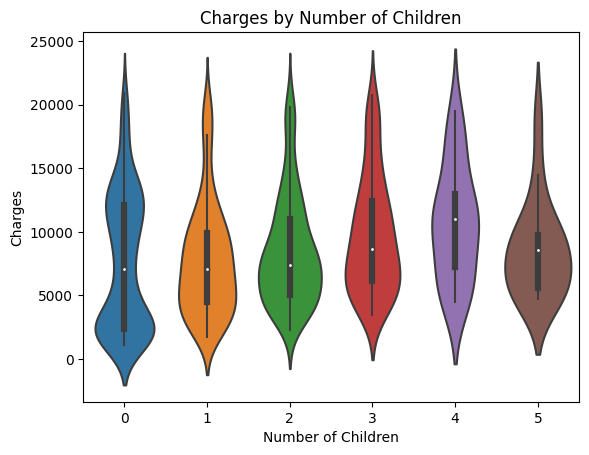

In [56]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

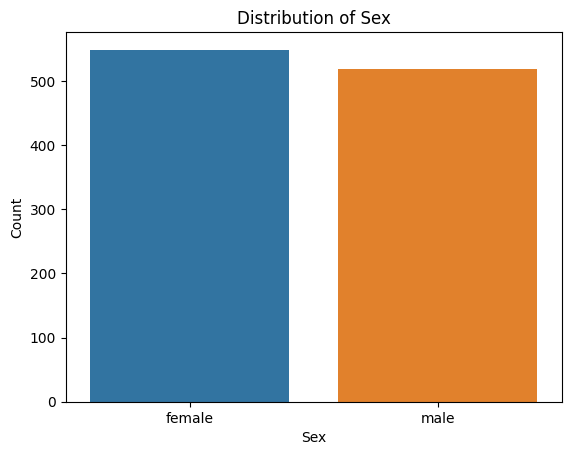

In [57]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

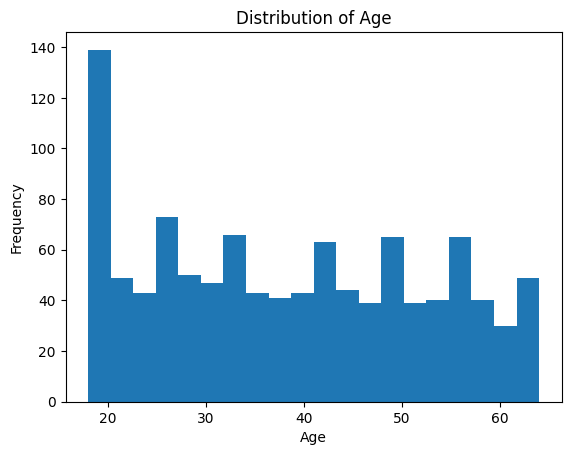

In [58]:
# distribution of age using histogram
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

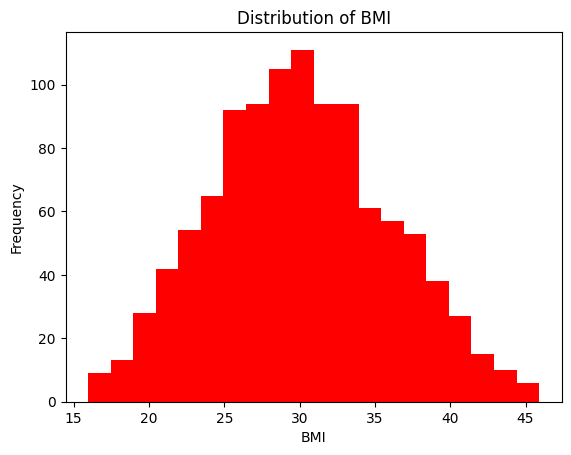

In [59]:
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

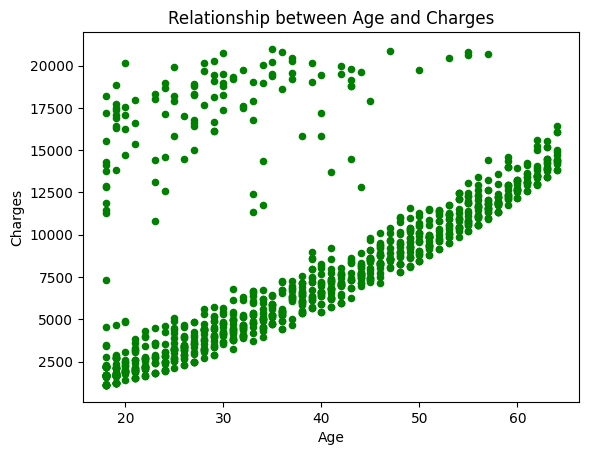

In [60]:
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

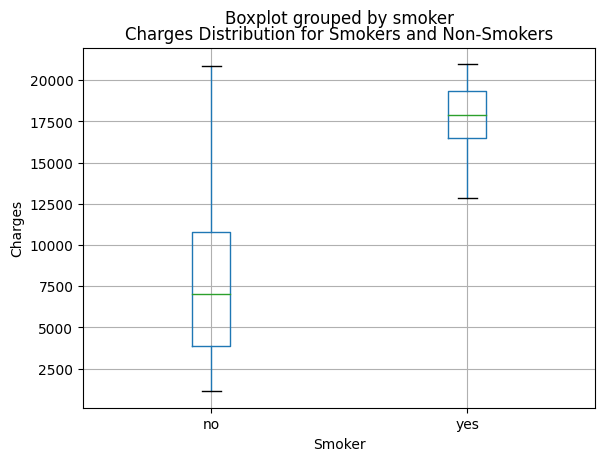

In [61]:
df_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

Cleaning Dataset

In [85]:
df_cleaned['region'].value_counts()

southwest    272
southeast    268
northwest    266
northeast    262
Name: region, dtype: int64

In [87]:
df_cleaned.replace({'sex':{'male':0,'female':1}},inplace=True)
df_cleaned.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df_cleaned.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

<ipython-input-87-0b9dfb626ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-87-0b9dfb626ec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-87-0b9dfb626ec3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [88]:
df_cleaned.head()


,age,sex,bmi,children,smoker,region,charges,age_group
0,19,1,27.90,0,0,1,16884.9240,Young
1,18,0,33.77,1,1,0,1725.5523,Young
2,28,0,33.00,3,1,0,4449.4620,Adult
4,32,0,28.88,0,1,2,3866.8552,Adult
5,31,1,25.74,0,1,0,3756.6216,Adult


In [89]:
# Drop the 'age_group' column
df_cleaned = df_cleaned.drop(columns=['age_group'])

# Print the updated DataFrame
print(df_cleaned.head())

   age  sex    bmi  children  smoker  region     charges
0   19    1  27.90         0       0       1  16884.9240
1   18    0  33.77         1       1       0   1725.5523
2   28    0  33.00         3       1       0   4449.4620
4   32    0  28.88         0       1       2   3866.8552
5   31    1  25.74         0       1       0   3756.6216


Correlation Matrix

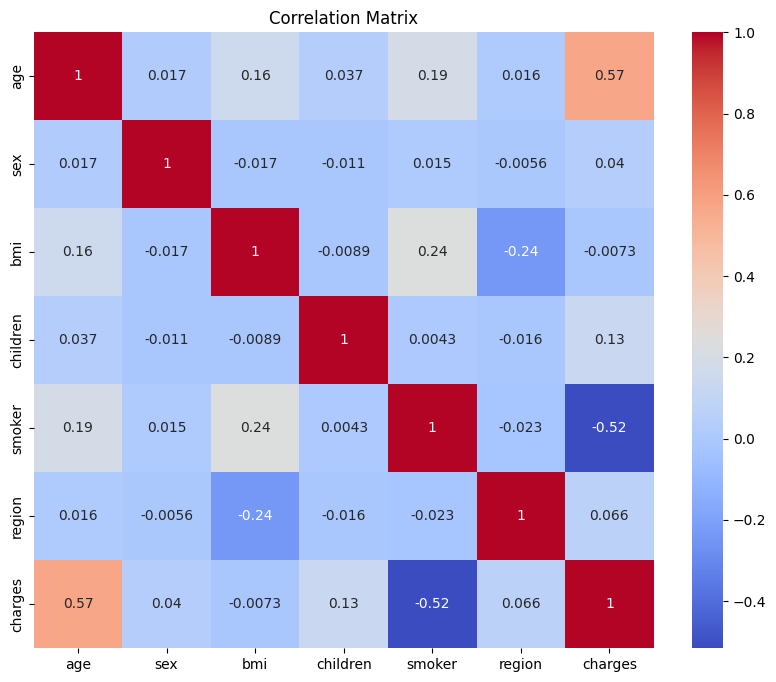

Relevant features based on correlation:
['age', 'smoker']


In [90]:
numr_cols = [x for x in df_cleaned.columns if x not in ['age_group']]
corr_matrix = df_cleaned[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist()
print("Relevant features based on correlation:")
print(relevant_features)

Train test split

In [91]:
# Select the relevant features
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
X_train.shape

(747, 6)

In [93]:
X_test.shape

(321, 6)

Plotting Decision boundary. Here used decision tree as regressor & Linear Regression

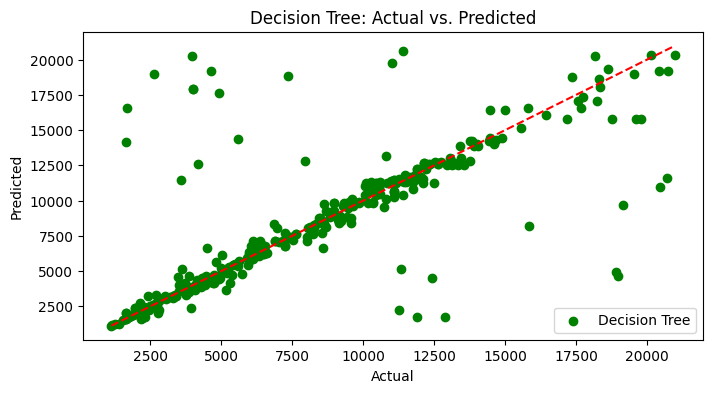

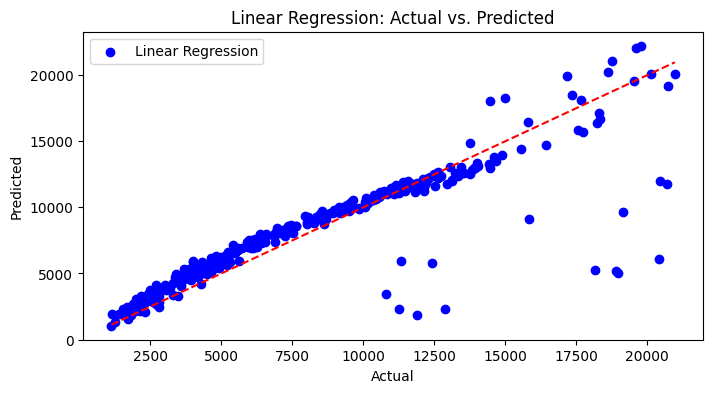

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Linear Regression (replace Gradient Boosting)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(8, 4))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


Calculating MSE and MAE

In [95]:
# Print the evaluation metrics
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)


print("Linear Regression - MSE: ", lr_mse)
print("Linear Regression - MAE: ", lr_mae)


Decision Tree - MSE:  10811491.255015971
Decision Tree - MAE:  1287.5768745482867
Linear Regression - MSE:  5395627.336288919
Linear Regression - MAE:  1171.000206951244


Calculating R-squared, MAE, MSE, R-MSE error for both model

In [96]:
# Print the evaluation metrics
print("Decision Tree - R-squared: {:.4f}, MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}".format(dt_r2, dt_mae, dt_mse, dt_rmse))
#print("Random Forest - R-squared: {:.4f}, MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}".format(rf_r2, rf_mae, rf_mse, rf_rmse))
print("Linear Regression - R-squared: {:.4f}, MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}".format(lr_r2, lr_mae, lr_mse, lr_rmse))

Decision Tree - R-squared: 0.5416, MAE: 1287.5769, MSE: 10811491.2550, RMSE: 3288.0832
Linear Regression - R-squared: 0.7712, MAE: 1171.0002, MSE: 5395627.3363, RMSE: 2322.8490


Best Performing model

In [97]:
best_model = "Decision Tree" if dt_r2 > lr_r2 else "Linear Regression"
print("\nBest Performing Model:", best_model)


Best Performing Model: Linear Regression


Saving the model

In [98]:

import pickle
from sklearn.linear_model import LinearRegression

# Assuming you have trained a Decision Tree model
dt_model = LinearRegression()
dt_model.fit(X_train, y_train)

# Save the model to a file using pickle
filename = 'New_linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(dt_model, file)


In [99]:
import pickle

# Load the saved linear regression model
filename = '/content/drive/MyDrive/Paid Task Coding Part/Regression/New_linear_regression_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Assuming you have test data (X_test), use the loaded model to make predictions
lr_predictions = loaded_model.predict(X_test)

# Print the predicted values
print("Linear Regression Predictions:")
print(lr_predictions)

Linear Regression Predictions:
[ 2852.81922283  9997.39130153 10590.19639047  9208.94117496
  6196.53505954  9502.46455543 11587.45079428  9273.64787211
 12067.71569032 11186.07347024  2223.16626287 16446.38094564
 11597.39835893 12819.70764584 16368.27383363 18110.31798263
  2344.67166125  4434.20592196 11535.28991209 11234.58418099
  5737.99717512  5076.51541883 11016.74689256  5853.78871063
  2290.03098423 11685.34851755  5023.21574826 14708.72111955
  5303.07895197  1904.77955512 11644.95468924 12346.01633002
 10849.37147677 10269.70399719  9293.61887593  2862.8293571
  6974.8938226   8563.824346    2226.19783487  6949.73623021
  6424.66848828  6354.65710168  1643.46045998  6977.8278589
  2726.60819469  8095.03341744  9365.3128573   1839.34441137
 10451.80749846  6934.12517451  5194.74633536  6111.11692081
 13146.65990613  8980.93417247  9680.47964136  1577.46411162
  9090.9927173  10972.68817695  2913.8010741  12547.12480776
  4150.03183961 11474.33328556  3139.09997413  3318.1992

Prediction System

In [106]:
import pickle

# Load the saved linear regression model
filename = 'New_linear_regression_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Format the custom data for prediction
custom_data = [[29,0,33.00,3,1,0]]  # Replace these values with your custom data

# Use the loaded model to make predictions
prediction = loaded_model.predict(custom_data)

# Print the predicted value
print("Predicted Insurance Charges:", prediction[0])

Predicted Insurance Charges: 5473.1563169909205


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
#input_df = (29,0,33.00,3,1,0)
#
input_df = (19,1,27.90,0,0,1)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lr_model.predict(input_df_reshaped)
print("Predicted value", prediction)

Predicted value [15485.73584866]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
